# Assignment 2 -  Decision Tree 

This assignment is about loading bank data on customers who have taken loans, analyzing various attributes associated with them to find future prospective customers.        

### Preparation

##### Setup

In [461]:
# Importing the required libraries
# Pandas for data procurement and manipulation using data frames
# Numpy to support large multidimensional matrices and arrays
# Matplotlib for data visualization

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import graphviz

In [52]:
#Setting Maximum displayed rows and columns and Maximum display width and height

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 500)


##### Loading file

In [53]:
#Loaded data of Personal Loan Data.xlsx is stored as Iris_df
#index_col is used to initialise Id column as the index

#Loading first sheet into a separate data frame. It contains attributes and descriptions.
#header to move to a particular row
#usecols to select columns to be used to input into data frame
#names to assign names to the columns
loan_data_description_df = pd.read_excel('.\Personal Loan Data.xlsx', sheet_name = 'Description', header = 6, usecols= 'B:C', names=['ID', 'Attribute', 'Description'])

#loading data
#giving names from the attributes that were previously loaded
#tolist is to convert data frame to list
loan_data_df = pd.read_excel('.\Personal Loan Data.xlsx', sheet_name = 'Data', names=loan_data_description_df["Attribute"].values.tolist(), )

In [54]:
loan_data_description_df

,Attribute,Description
0,ID,Customer ID
1,Age,Customer's age in completed years
2,Experience,#years of professional experience
3,Income,Annual income of the customer ($000)
4,ZIPCode,Home Address ZIP code.
5,Family,Family size of the customer
6,CCAvg,Avg. spending on credit cards per month ($000)
7,Education,Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
8,Mortgage,Value of house mortgage if any. ($000)
9,Personal Loan,Did this customer accept the personal loan offered in the last campaign?


In [55]:
# Checking for Null
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [56]:
# Checking for Number of unique values in each column

for i in loan_data_df.columns:
    print(i," : ", len(loan_data_df[i].unique()))

ID  :  5000
Age  :  45
Experience  :  47
Income  :  162
ZIPCode  :  467
Family  :  4
CCAvg  :  108
Education  :  3
Mortgage  :  347
Personal Loan  :  2
Securities Account  :  2
CD Account  :  2
Online  :  2
CreditCard  :  2


In [57]:
loan_data_df.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIPCode               93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

##### Dropping ID and Zipcode

<p>I am dropping ID and Zipcode from the dataset as they don't provide any reasonable information. We remove Zipcode as it doesn't provide a concrete information like describing the demographic or the economic status in that particular area and ID for obvious reasons.</p>

In [58]:
loan_data_df_final = loan_data_df.drop(columns={'ID', 'ZIPCode'})

In [59]:
loan_data_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


##### Dropping Duplicates

In [60]:
loan_data_df_final = loan_data_df_final.drop_duplicates()

In [61]:
loan_data_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4987 non-null   int64  
 1   Experience          4987 non-null   int64  
 2   Income              4987 non-null   int64  
 3   Family              4987 non-null   int64  
 4   CCAvg               4987 non-null   float64
 5   Education           4987 non-null   int64  
 6   Mortgage            4987 non-null   int64  
 7   Personal Loan       4987 non-null   int64  
 8   Securities Account  4987 non-null   int64  
 9   CD Account          4987 non-null   int64  
 10  Online              4987 non-null   int64  
 11  CreditCard          4987 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 506.5 KB


##### Data Prep for Training dataset - Question 1

In [62]:
# I am ignoring days feature 
trial_data = {   'Outlook' : ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'], 
                'Temp' : ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'], 
                'Humidity' : ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'], 
                'Wind' : ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'], 
                'Play' : ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}

In [63]:
trial_df = pd.DataFrame(trial_data)

In [64]:
trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Wind      14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


### Decision Tree From Scratch

##### Calculate Gini

In [76]:
# Calculates Gini index for a given dataframe and target column
# X - dataframe
# y_val - unique values in target column
# column - target column

def gini_calc(X, y_val, column):
    size = len(X)
    score = 0.0
    p = 0.0
    for val in y_val:
        p = len(X[X[column].map(lambda i: i == val)]) / size
        score += p*p

    return (1 - score)

In [253]:
def gini_split_calc(X, target_column, split_column):
    size = len(X)
    score = 0.0
    # Continuous
    if(len(X[split_column].unique()) > 30):

        split_location = X[split_column].mean()

        greater_than_mean = X[X[split_column].map(lambda i : i >= split_location)]
        less_than_mean = X[X[split_column].map(lambda i : i < split_location)]

        score += gini_calc(greater_than_mean, X[target_column].unique(), target_column) * len(greater_than_mean) / size
        score += gini_calc(less_than_mean, X[target_column].unique(), target_column) * len(less_than_mean) / size

        return score
    # Discrete
    else :
        
        for val in X[split_column].unique():
            segment = X[X[split_column].map(lambda i : i == val)]
            score += gini_calc(segment, X[target_column].unique(), target_column) * len(segment) / size

        return score


##### Max Gini Gain

In [254]:
def max_gini_gain(X, target_column):

    columns = X.columns

    gini_i = gini_calc(X, X[target_column].unique(), target_column)

    max = 0.0

    column = ''

    for col in columns:
        if(col != target_column):
            gini_col = gini_split_calc(X, target_column, col)

            if (max < gini_i - gini_col):
                max = gini_i - gini_col
                column = col

    return column, max


In [109]:
col, val = max_gini_gain(trial_df, 'Play')

In [110]:
print(col, " : ", val)

Outlook  :  0.11632653061224485


##### Function for Splitting

In [255]:
# Splitting based on an feature
# Drops the feature if its discrete 
# 1 for continuous and 0 for discrete
def split(X, column, parent_node, child_nodes):
    Groups = {}
    # Continuous
    if(len(X[column].unique()) > 30):

        split_location = X[column].mean()

        # Update Parent and Child Nodes
        parent_node.split_column = column
        parent_node.split_column_type = 1

        child_nodes[0] = Node()
        child_nodes[1] = Node()


        child_nodes[0].split_value = split_location
        child_nodes[1].split_value = split_location

        Groups[0] = X[X[column].map(lambda i : i >= split_location)]
        Groups[1] = X[X[column].map(lambda i : i < split_location)]

        return Groups
    # Discrete
    else:
        # Update Parent and Child Nodes
        parent_node.split_column = column
        parent_node.split_column_type = 0

        j = 0
        for val in X[column].unique():
            child_nodes[j] = Node()
            child_nodes[j].split_value = val
            Groups[j] = X[X[column].map(lambda i : i == val)]
            j += 1

        j = 0
        while j < len(Groups):
            Groups[j] = Groups[j].drop(columns= column)
            j += 1
            
        return Groups

##### Growing a Tree, Node class and Generating predictions

In [500]:
# Node
# split_column_type : 1 for continuous and 0 for discrete
class Node:
    def __init__(self, value = None, split_value = None, split_column = None, split_column_type = None, is_leaf = False):
        # if leaf the value here is equal to target
        self.value = value

        # Split value, split based on this from parent
        self.split_value = split_value

        # Split based on this for children
        self.split_column = split_column
        self.split_column_type = split_column_type

        self.is_leaf = is_leaf
        self.children = {}
    
    # Predicting for a single record
    def predict_record(self, record):
        if(self.is_leaf == True):
            return self.value

        val = record[self.split_column].array[0]
        X = record
        
        # print(val)

        # Continuous
        if(self.split_column_type == 1):
            
            split_location = self.children[0].split_value

            if(val >= split_location):
                # return predict_record(record=record, node=self.children[0])
                return self.children[0].predict_record(record=record)
            else:
                # return predict_record(record=record, node=self.children[1])
                return self.children[1].predict_record(record=record)
            

        # Discrete
        else:
            j = 0
            while j < len(self.children):
                # print(j, node.children[j].split_value)
                # print(type(val))
                # print(type(node.children[j].split_value))
                if(val == self.children[j].split_value):
                    # print(j, node.children[j].split_value)

                    # return predict_record(record= pd.DataFrame(X), node= self.children[j])
                    return self.children[j].predict_record(record= pd.DataFrame(X))

                j += 1

    # Predicting for a test data frame
    def predict_test_df(self, test_df):
        y_pred = list(range(len(test_df)))

        j=0

        while j < len(test_df):

            y_pred[j] = self.predict_record(pd.DataFrame(test_df[j:j+1]))
            j += 1
        
        return y_pred

    #Build Decision Tree
    # Recursion
    def build_decision_tree (self, X, target_column, max_depth, current_depth = 0):

        # print()
        # print(X[target_column].unique(), " : ", len(X))
        # print()

        # Check for homogenous condition
        if(len(X[target_column].unique()) == 1):

            self.value = X[target_column].unique()[0]
            self.is_leaf = True
            # print("Homogenous : " , current_depth, " : ", self.is_leaf, " : " ,self.value)
            # print("Homogenous : " , current_depth, " : ", self.is_leaf, " : " ,self.value)
            return


        # Check if there is only one feature left
        # Here the feature will be target feature
        if(len(X.columns) == 1):

            self.is_leaf = True

            target_val = X[target_column].unique()

            self.value = X[target_column].unique()[0]
            max = len(X[X[target_column].map(lambda i : i == self.value)])

            for val in target_val:
                if(max < len(X[X[target_column].map(lambda i : i == val)])):
                    max = len(X[X[target_column].map(lambda i : i == val)])
                    self.value = val

            # print("one feature : ", X.columns)
            return
        # Check if current depth equal to max depth
        if(current_depth == max_depth):

            self.is_leaf = True

            target_val = X[target_column].unique()

            self.value = X[target_column].unique()[0]
            max = len(X[X[target_column].map(lambda i : i == self.value)])

            for val in target_val:
                if(max < len(X[X[target_column].map(lambda i : i == val)])):
                    max = len(X[X[target_column].map(lambda i : i == val)])
                    self.value = val
                    
            # print("max depth : ", current_depth)
            return

        current_depth += 1

        column, max = max_gini_gain(X, target_column)

        groups = {}
        groups = split(X, column=column, parent_node=self, child_nodes = self.children)

        # print(groups)

        j = 0

        while j < len(self.children):
            self.children[j].build_decision_tree(X= groups[j], target_column= target_column, current_depth= current_depth, max_depth= max_depth)
            j += 1



##### Functions

In [419]:
# Recursion
# Built into node now
def build_decision_tree (node, X, target_column, max_depth, current_depth = 0):

    # print()
    # print(X[target_column].unique(), " : ", len(X))
    # print()

    # Check for homogenous condition
    if(len(X[target_column].unique()) == 1):

        node.value = X[target_column].unique()[0]
        node.is_leaf = True
        # print("Homogenous : " , current_depth, " : ", node.is_leaf, " : " ,node.value)
        # print("Homogenous : " , current_depth, " : ", node.is_leaf, " : " ,node.value)
        return


    # Check if there is only one feature left
    # Here the feature will be target feature
    if(len(X.columns) == 1):

        node.is_leaf = True

        target_val = X[target_column].unique()

        node.value = X[target_column].unique()[0]
        max = len(X[X[target_column].map(lambda i : i == node.value)])

        for val in target_val:
            if(max < len(X[X[target_column].map(lambda i : i == val)])):
                max = len(X[X[target_column].map(lambda i : i == val)])
                node.value = val

        # print("one feature : ", X.columns)
        return
    # Check if current depth equal to max depth
    if(current_depth == max_depth):

        node.is_leaf = True

        target_val = X[target_column].unique()

        node.value = X[target_column].unique()[0]
        max = len(X[X[target_column].map(lambda i : i == node.value)])

        for val in target_val:
            if(max < len(X[X[target_column].map(lambda i : i == val)])):
                max = len(X[X[target_column].map(lambda i : i == val)])
                node.value = val
                
        # print("max depth : ", current_depth)
        return

    current_depth += 1

    column, max = max_gini_gain(X, target_column)

    groups = {}
    groups = split(X, column=column, parent_node=node, child_nodes = node.children)

    # print(groups)

    j = 0

    while j < len(node.children):
        build_decision_tree(node= node.children[j], X= groups[j], target_column= target_column, current_depth= current_depth, max_depth= max_depth)
        j += 1


In [499]:
# Predicting for a single record
# Built into node now
def predict_record(record, node):
    if(node.is_leaf == True):
        return node.value

    val = record[node.split_column].array[0]
    X = record
    
    # print(val)

    # Continuous
    if(node.split_column_type == 1):
        split_location = node.children[0].split_value

        if(val >= split_location):
            return predict_record(record=record, node=node.children[0])
        else:
            return predict_record(record=record, node=node.children[1])

    # Discrete
    else:
        j = 0
        while j < len(node.children):
            # print(j, node.children[j].split_value)
            # print(type(val))
            # print(type(node.children[j].split_value))
            if(val == node.children[j].split_value):
                # print(j, node.children[j].split_value)

                return predict_record(record= pd.DataFrame(X), node= node.children[j])

            j += 1


In [444]:
# Accuracy Calculation
def CalcAccuracy(y_test, y_pred) :

    total = len(y_test)

    correct = 0

    # print(total)
    j = 0
    while j < total:
        if y_test[j] == y_pred[j] :
            correct += 1
        j += 1

    accuracy = correct / total
    return accuracy


#### Question 1

##### Generating Test Dataframe from Question 1

In [430]:
# I am ignoring days feature 
test_data = {   'Outlook' : ['Sunny', 'Sunny'], 
                'Temp' : ['Cool', 'Mild'], 
                'Humidity' : ['Normal', 'Normal'], 
                'Wind' : ['Weak', 'Weak'], 
                'Play' : ['Yes', 'Yes']}

In [431]:
test_df = pd.DataFrame(test_data)

In [432]:
test_df

,Outlook,Temp,Humidity,Wind,Play
0,Sunny,Cool,Normal,Weak,Yes
1,Sunny,Mild,Normal,Weak,Yes


##### Training and Predicting

In [520]:
# Create a Node
root = Node()

# Train to build the tree
root.build_decision_tree(trial_df, 'Play', 5)

# Testing
y_pred = root.predict_test_df(test_df)

In [521]:
y_test = test_df['Play'].array

y_test

<PandasArray>
['Yes', 'Yes']
Length: 2, dtype: object

In [522]:
accuracy = CalcAccuracy(y_test, y_pred)

print(str(accuracy * 100) + '%')

100.0%


#### Question 2

##### Correlation Matrix

In [454]:
# Correlation Matrix
loan_data_df_final.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994221,-0.056897,-0.045533,-0.052540,0.042356,-0.013014,-0.008003,-0.000715,0.007849,0.013989,0.006381
Experience,0.994221,1.000000,-0.048277,-0.051718,-0.050610,0.014166,-0.011083,-0.007708,-0.001529,0.010151,0.014245,0.007628
Income,-0.056897,-0.048277,1.000000,-0.157922,0.646073,-0.186847,0.206420,0.502513,-0.002992,0.169589,0.014646,-0.003479
Family,-0.045533,-0.051718,-0.157922,1.000000,-0.109812,0.066145,-0.020595,0.061398,0.019957,0.014081,0.009907,0.012018
CCAvg,-0.052540,-0.050610,0.646073,-0.109812,1.000000,-0.135299,0.109166,0.366672,0.014573,0.136244,-0.002727,-0.007404
Education,0.042356,0.014166,-0.186847,0.066145,-0.135299,1.000000,-0.032256,0.137618,-0.010132,0.014475,-0.015633,-0.010307
Mortgage,-0.013014,-0.011083,0.206420,-0.020595,0.109166,-0.032256,1.000000,0.141700,-0.005909,0.088987,-0.005266,-0.007930
Personal Loan,-0.008003,-0.007708,0.502513,0.061398,0.366672,0.137618,0.141700,1.000000,0.021670,0.316210,0.006718,0.002399
Securities Account,-0.000715,-0.001529,-0.002992,0.019957,0.014573,-0.010132,-0.005909,0.021670,1.000000,0.316883,0.013096,-0.015466
CD Account,0.007849,0.010151,0.169589,0.014081,0.136244,0.014475,0.088987,0.316210,0.316883,1.000000,0.176414,0.278559


<p>Features with high correlation with the target feature are <b>Income</b>, <b>CCAvg</b>, <b>CD Account</b>, <b>Mortgage</b> and <b>Education</b></p>

##### Pair Plot Scatter Map

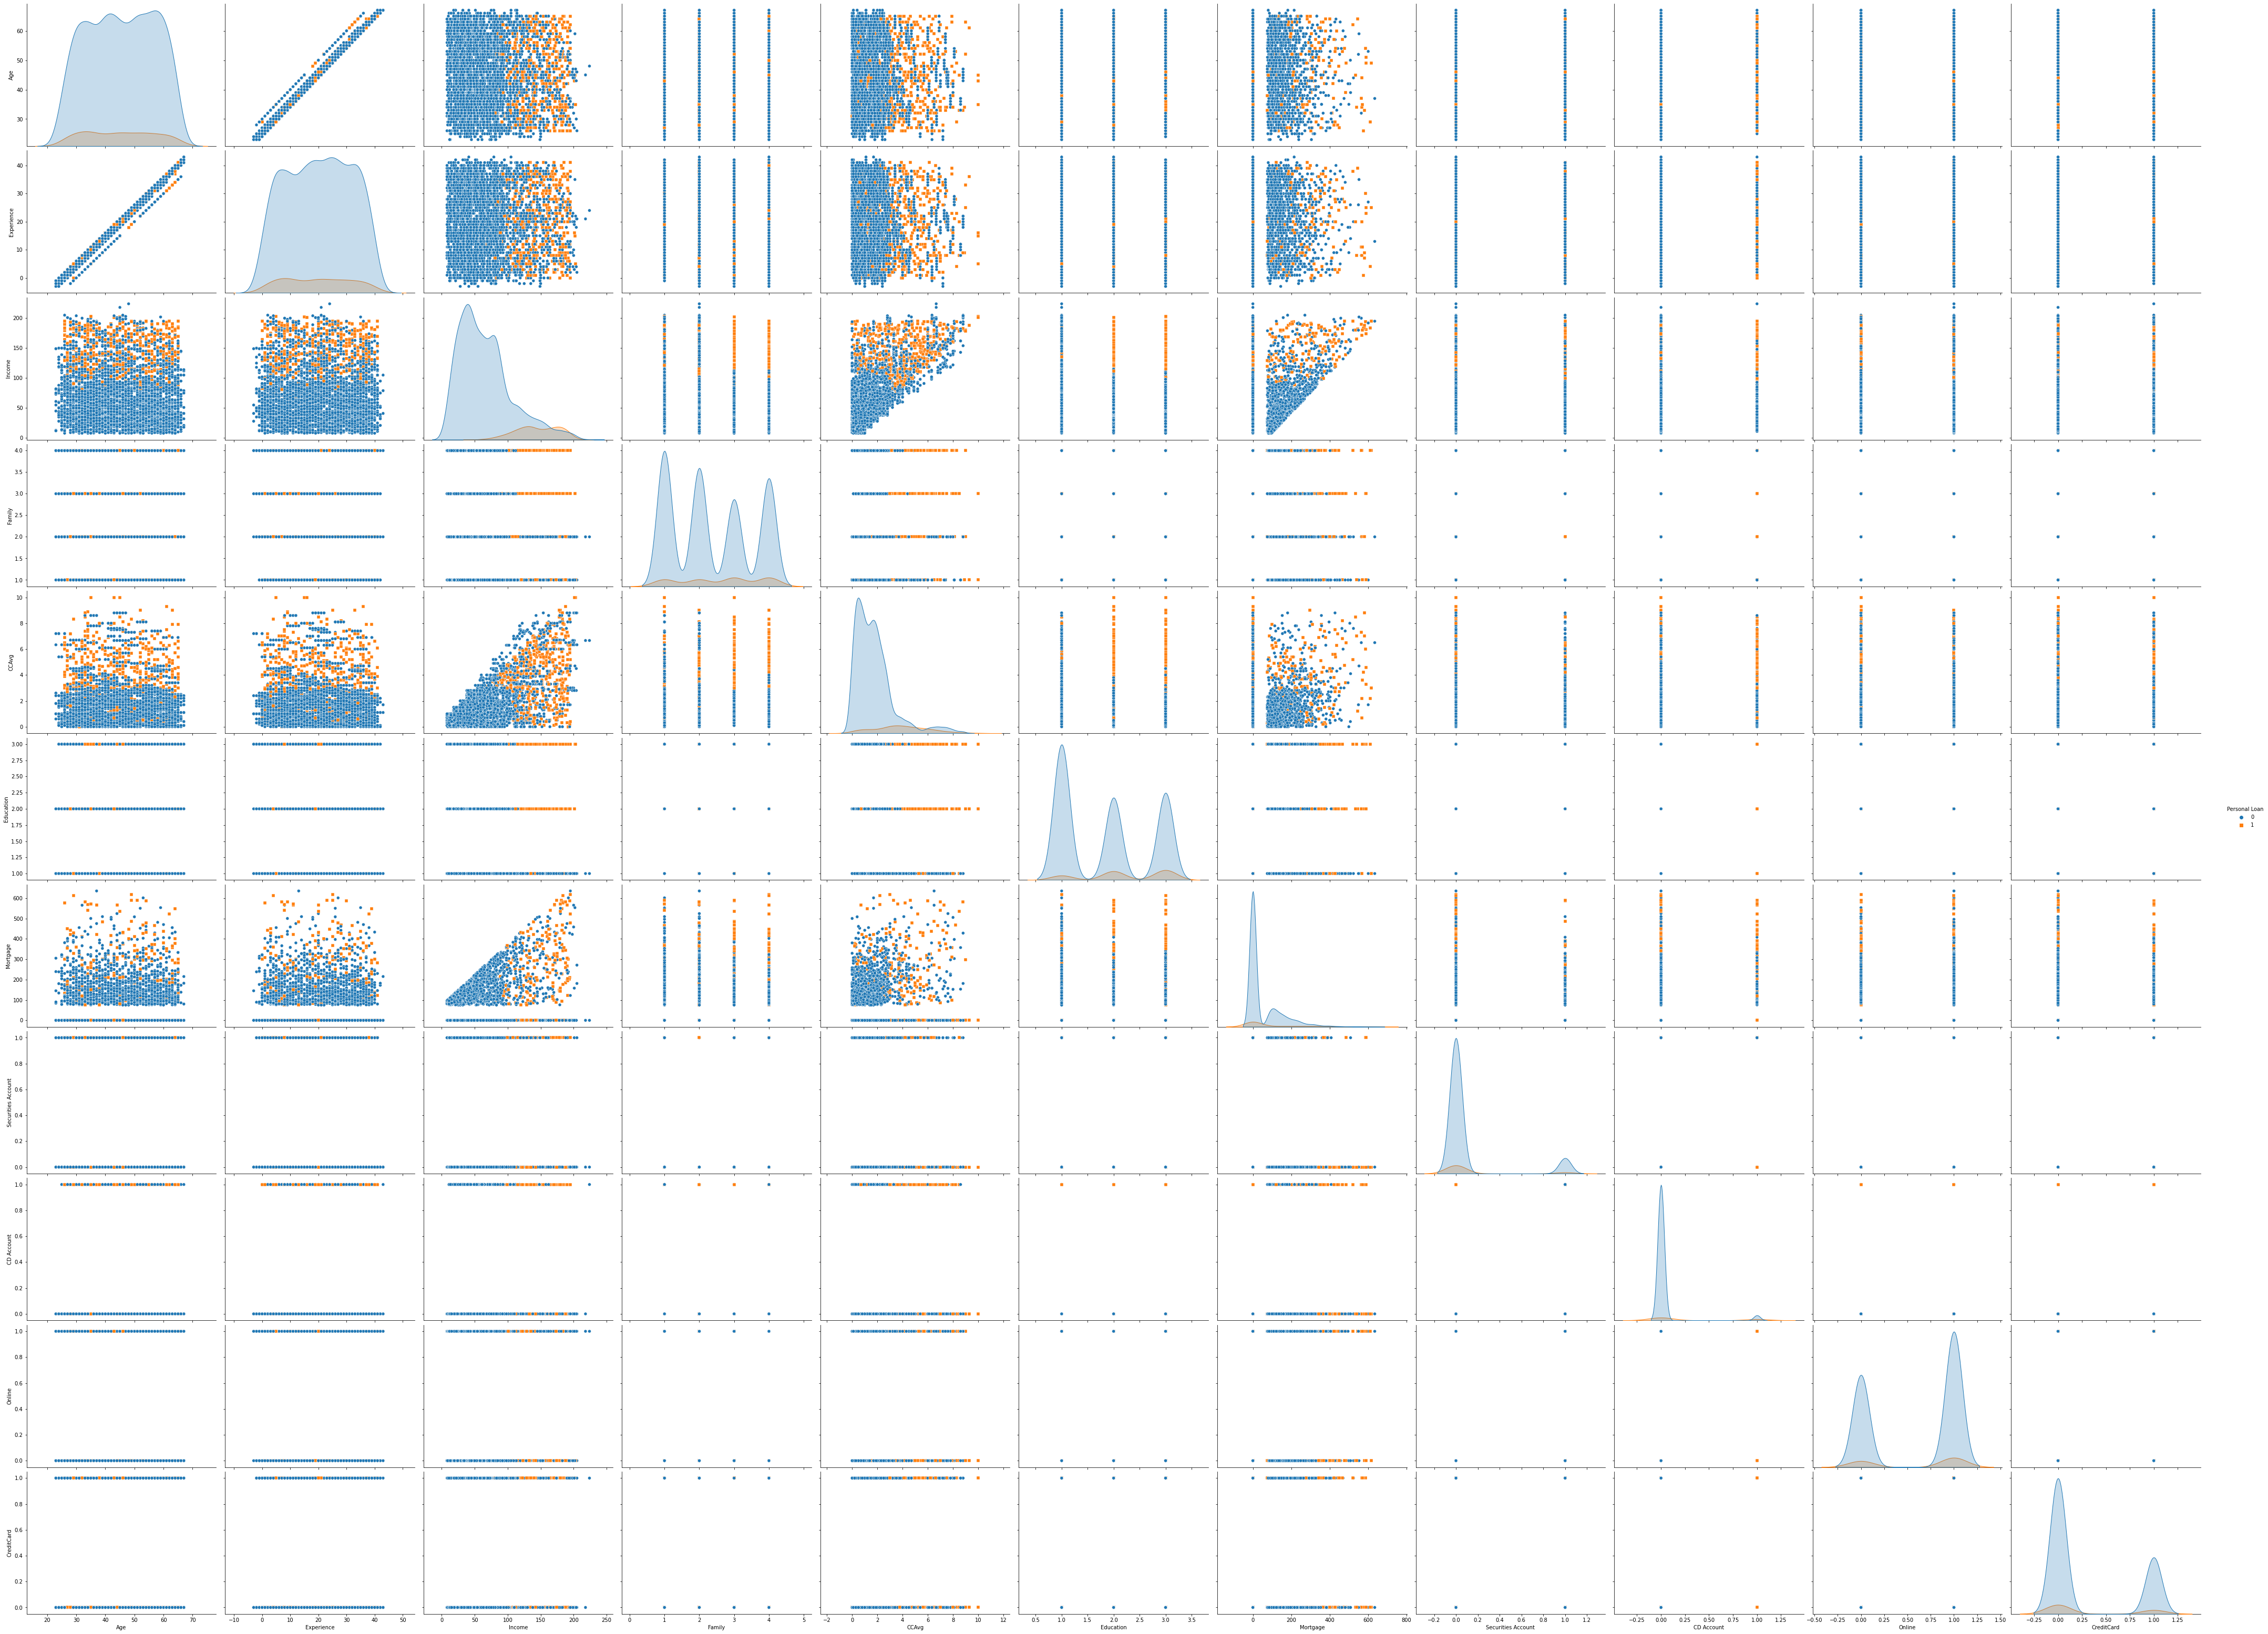

In [457]:
# Pair plot for scatter map
sns.pairplot(data=loan_data_df_final, hue="Personal Loan", markers=["o", "s"], height= 4, aspect=1.35)

##### Pair Plot Heat Map

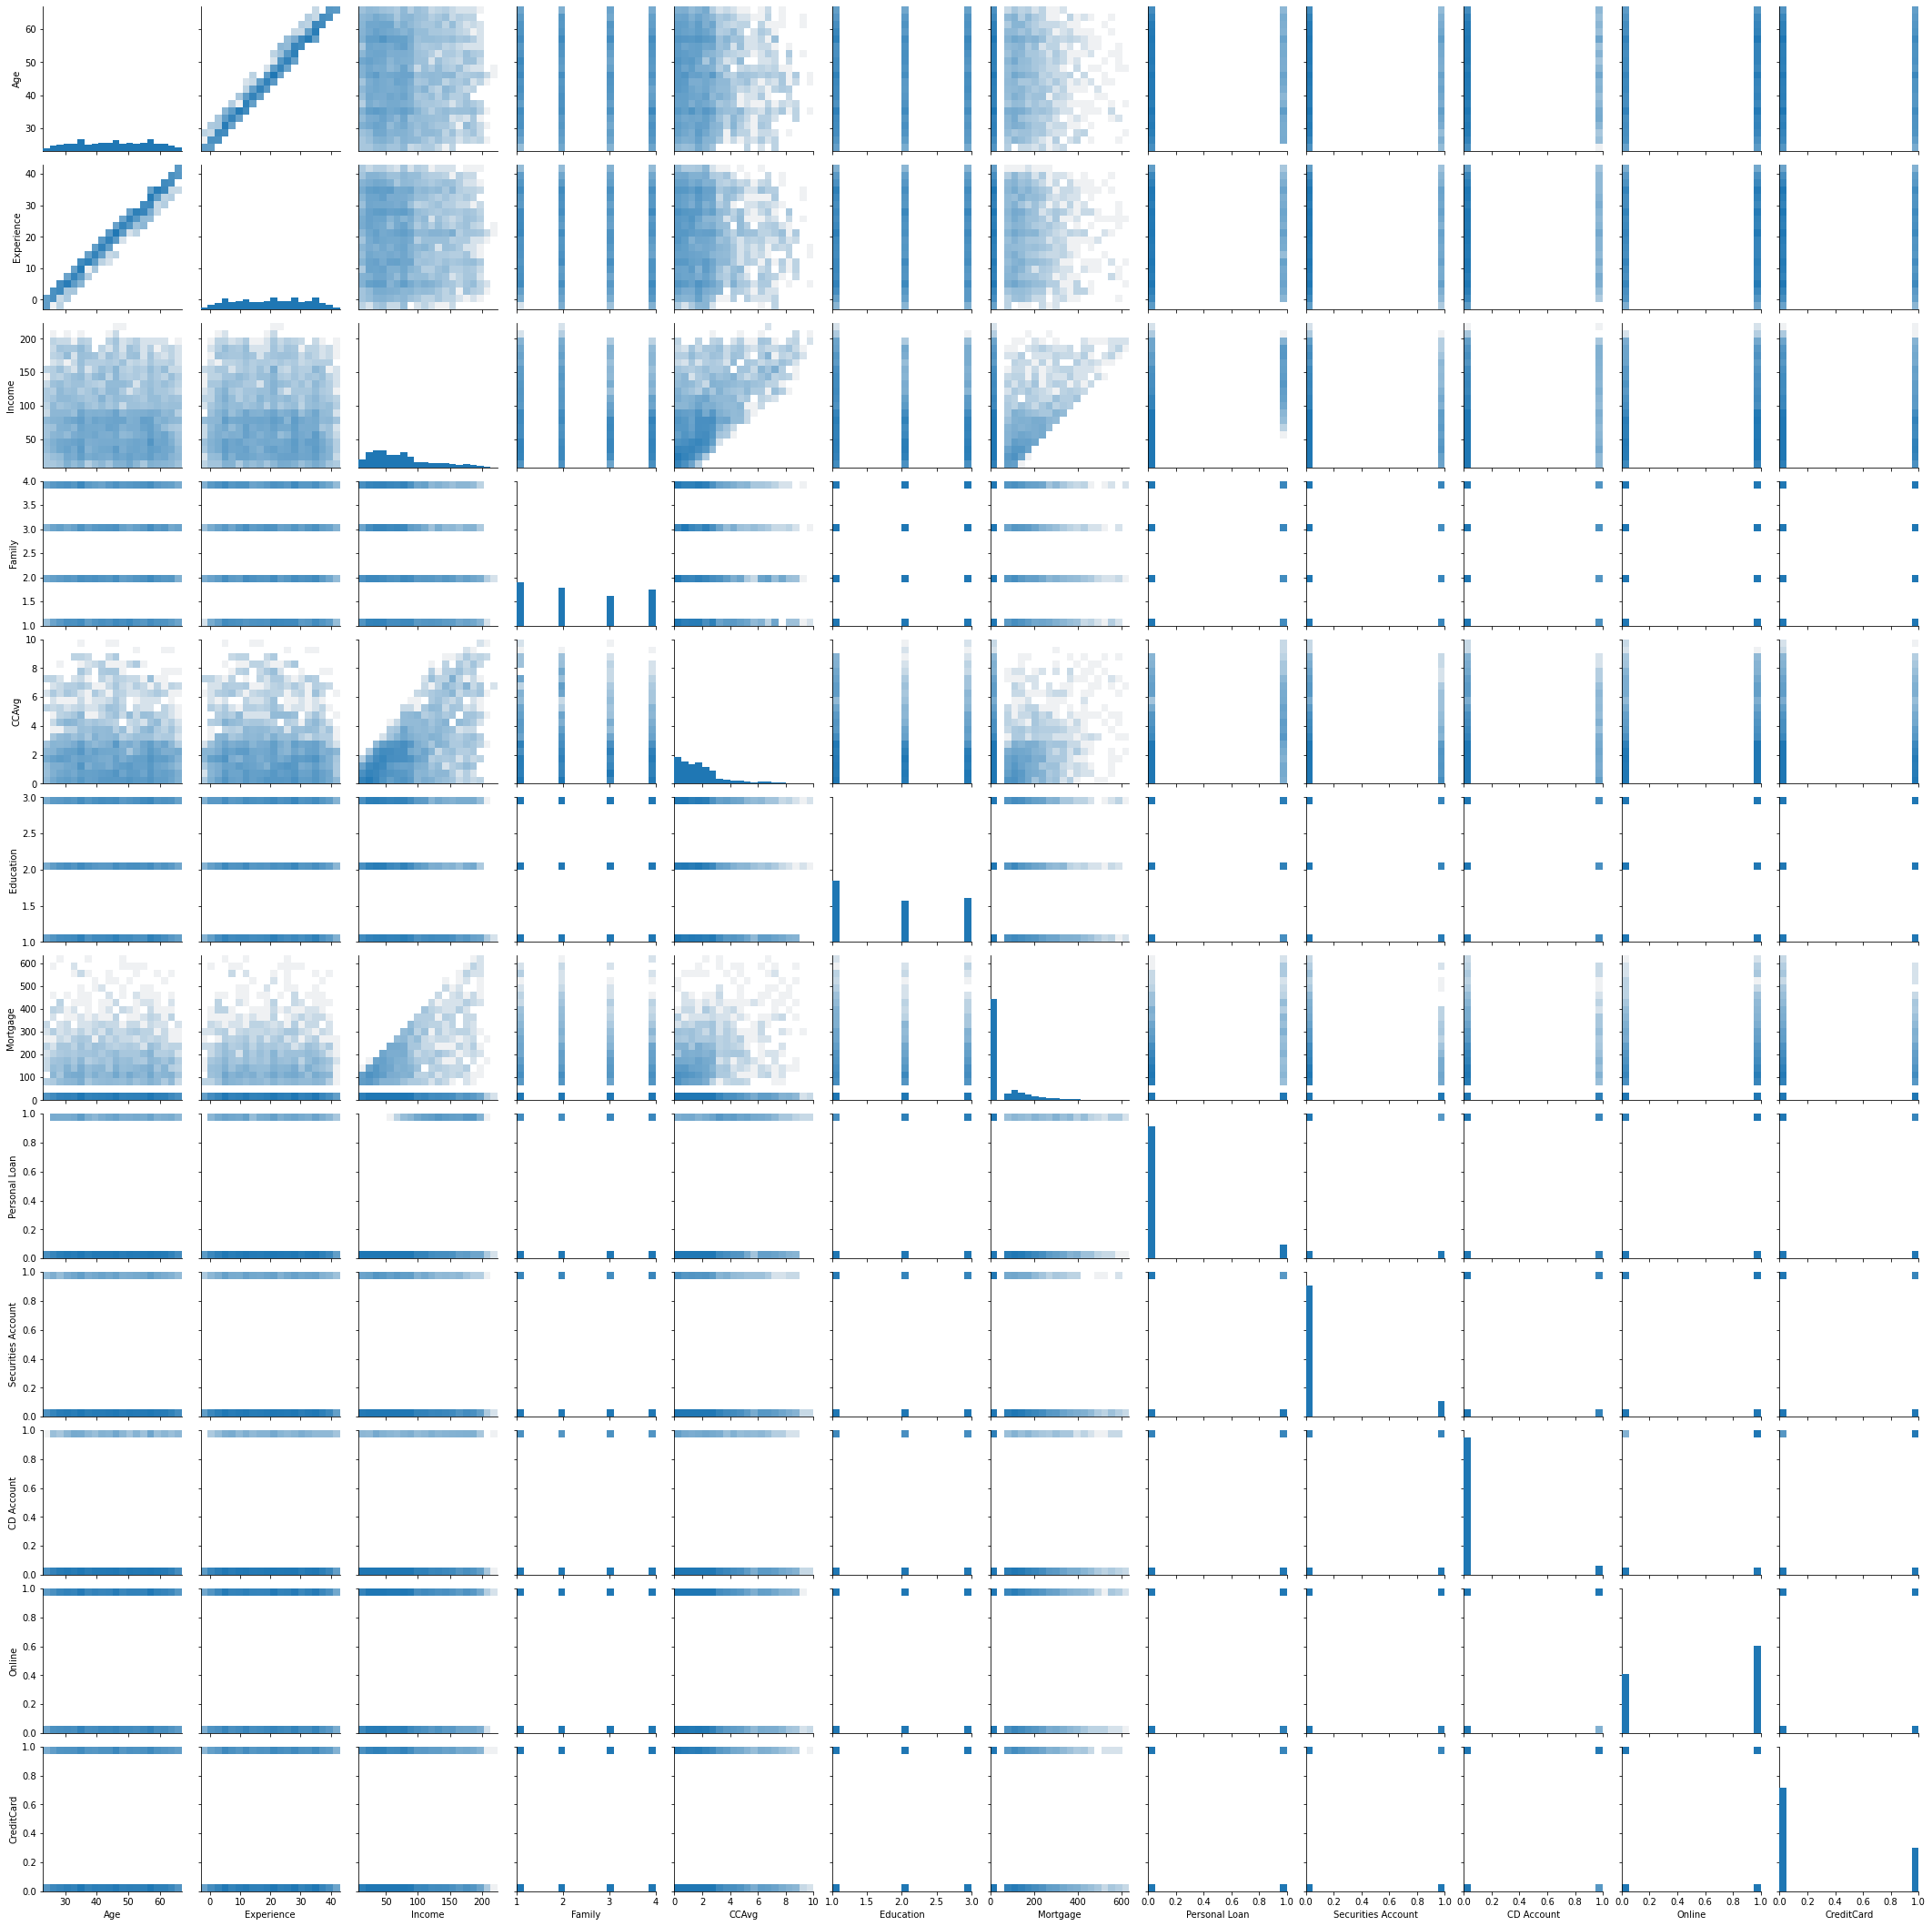

In [462]:
# pair plot heat map
g = sns.PairGrid(loan_data_df_final)
g.map_diag(plt.hist, bins=20)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

g.map_offdiag(pairgrid_heatmap, bins=20, norm=LogNorm())

##### Model

<p>I am not doing any feature selection because decision trees have an inbuilt feature selection to them. I am going to do pre-prunning using max tree depth setting it to 50 when I don't want any prunning then checking for depth of 5, 4, 3 to perform comparisons</p>

<p>I am removed ZipCode and ID because they don't provide relevant information. I am considering all feature with more than 30 unique values as continuous. I am also splitting data based on mean if the split is performed based on continuous attribute. For categorical attributes a multi split is performed based on the unique values it can take</p>

In [466]:
# Training data
loan_data_df_final.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [467]:
# Train Test split
# Load_data_test_df - test data
# Sampled using sample function from pandas
# frac = 0.2 provides data that is 20 % of total dataset
# Printing shape to confirm sizes
loan_test_df = loan_data_df_final.sample(frac = 0.20)

print("loan_test_df shape")
print(loan_test_df.shape)

# Equating it to total data set
loan_train_df = loan_data_df_final;

# Printing shape before removing test
print("\loan_train_df shape before removal")
print(loan_train_df.shape)

# cond - condition, checks for ID equalities between test and training data
cond = loan_train_df.index.isin(loan_test_df.index)

# Drop data from training based on condition - cond
loan_train_df.drop(loan_train_df[cond].index, inplace = True)

# Printing shape to confirm sizes after removal of data
print("\loan_train_df shape after removal")
print(loan_train_df.shape)

loan_test_df shape
(997, 12)
\loan_train_df shape before removal
(4987, 12)
\loan_train_df shape after removal
(3990, 12)


In [468]:
loan_train_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
5,37,13,29,4,0.4,2,155,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0


In [469]:
loan_test_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3680,36,11,32,3,1.3,1,0,0,0,0,0,0
2087,51,27,188,2,6.9,2,343,1,0,0,1,0
3090,61,31,19,1,1.5,3,0,0,0,0,1,0
2877,58,32,74,2,2.3,3,0,0,0,0,0,1
4734,63,39,64,1,1.8,3,147,0,0,0,1,1


In [509]:
# Model and Prediction for unlimited depth
parent = Node()

# Build Tree
parent.build_decision_tree(loan_train_df, 'Personal Loan', 200)

# Getting prediction and Test data
y_test = loan_test_df['Personal Loan'].array

y_pred = root.predict_test_df(loan_test_df)


accuracy = CalcAccuracy(y_test, y_pred)

print(str(round(accuracy * 100, 2)) + '%')


93.78%


93.78% accuracy with 4.5 second runtime

In [510]:
# Model and Prediction for depth = 5
parent = Node()

# Build Tree
parent.build_decision_tree(loan_train_df, 'Personal Loan', 5)

# Getting prediction and Test data
y_test = loan_test_df['Personal Loan'].array

y_pred = root.predict_test_df(loan_test_df)


accuracy = CalcAccuracy(y_test, y_pred)

print(str(round(accuracy * 100, 2)) + '%')


95.69%


95.69% accuracy with 3.3 second runtime

In [511]:
# Model and Prediction for depth = 4
parent = Node()

# Build Tree
parent.build_decision_tree(loan_train_df, 'Personal Loan', 4)

# Getting prediction and Test data
y_test = loan_test_df['Personal Loan'].array

y_pred = root.predict_test_df(loan_test_df)


accuracy = CalcAccuracy(y_test, y_pred)

print(str(round(accuracy * 100, 2)) + '%')


97.39%


97.39% accuracy with 1.7 second runtime

In [512]:
# Model and Prediction for depth = 3
parent = Node()

# Build Tree
parent.build_decision_tree(loan_train_df, 'Personal Loan', 3)

# Getting prediction and Test data
y_test = loan_test_df['Personal Loan'].array

y_pred = root.predict_test_df(loan_test_df)


accuracy = CalcAccuracy(y_test, y_pred)

print(str(round(accuracy * 100, 2)) + '%')


95.59%


95.59% accuracy with 0.9 second runtime

##### Summary
<p>Out of all the possible values for max depth, 4 seems to provide the highest accuracy with a considerably minimum addition to complexity </p>